# iNaturalist Data from the Global Biodiversity Information Facility (GBIF): Dataset Overview and Use Case Examples
## EDS 220, Fall 2022

This notebook will help you navigate, download, and use iNaturalist data from GBIF.

#### Authors
All authors are affiliated with the Bren School of Environmental Science and Management at the University of California Santa Barbara
- Kiran Favre, Masters of Environmental Data Science, 2023, kfavre@ucsb.edu
- Jillian Allison, Masters of Environmental Data Science, 2023, jilliannallison@ucsb.edu
- Erica Bishop, Masters of Environmental Data Science, 2023, ericabishop@ucsb.edu


## Table of Contents

[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. References](#references)

<a id='purpose'></a> 
### Notebook Purpose

We are creating this notebook to: 
- Explain the contents of iNaturalist data: what data is collected and what is the associated metadata? 
- Demonstrate how to download this data for analysis.
- Show programmers some examples of visualizing and working with data from iNaturalist using Python.


<a id='overview'></a> 
### Dataset Description

iNaturalist is a platform and social network for citizen scientists and biologists to upload photos of observed species along with the location and time collected. This dataset is a collection of iNaturalist research grade observations. Research grade observations are defined by having a photo, date, and coordinate provided and the community agrees upon the identification. iNaturalist users can identify the species in the photo based on previous users’ uploads and community input [1]. 

This dataset was created and hosted by iNaturalist, an initiative by the California Academy of Sciences and National Geographic Society. It is also hosted on GBIF. GBIF, according to its website, "is an international network and data infrastructure funded by the world’s governments and aimed at providing anyone, anywhere, open access to data about all types of life on Earth.” The standardized data in GBIF allows anyone in the world to access high quality ecological data [2].

The iNaturalist dataset’s temporal span is from 1768 to present. Older data is based on historical records. The iNaturalist app was created in 2008, and people with iPhones have uploaded their own data via the app in recent years. iNaturalist data covers the entire globe [1].

Some issues with data quality are highlighted by tags on the download report. Some of these issues include matching taxon to the correct identification, matching incorrect countries and coordinates, or multimedia date invalidities [2].


<a id='io'></a> 
### Dataset Input/Output 

There are a few different ways that we can access iNaturalist data. iNaturalist does manage an export feature on their website, but they note that large exports slow down their infrastructure. Their top recommendation for exporting data is to use GBIF. The file format used to store the data is a tab-delimited CSV.

To access data from GBIF you first need to set up an account. You can use your GitHub account to set this up. After you've created an account, you have two options for downloading data, the GBIF API or a file download.

**How to use the API**

The GBIF API is relatively easy to use. The prerequisity `pygbif` package for importing data into a python envionrment is already instealled in the Python 3 kernel on Taylor. The API includes several different modules that you can use to search and query data. The examples below show how to use the `species` module or the `occurences` module to get iNaturalist data on Adelie penguins.

There are many arguments you can use to query data from the API, and data is returned as a dictionary. Checkout the [pygbif 0.6.1 documentation](https://pygbif.readthedocs.io/en/latest/index.html) for more query examples [3].

In [1]:
import pygbif #package to interface with GBIF API - this is preloaded on the Python3 kernel on taylor
from pygbif import species #can call specific modules for searching
from pygbif import occurrences as occ #easier to rename this for shorter coding in the use cases below
adeliae_dict = species.name_lookup(institution_code="iNaturalist", q='Pygoscelis adeliae') #using the species lookup

**How to download files from GBIF**

For easily importing data you're interested in, you may want to download a TSV file from GBIF.

**Reading in data to your environment**

1) Import necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import cartopy
import cartopy.crs as ccrs

2) Parameters for our data

Our iNaturalist data:
- names of any directories where data are stored
- ranges of years over which data are valid
- any thresholds or latitude/longitude ranges to be used later (e.g. dimensions of NINO3.4 region, threshold SSTA values for El Nino, etc.)

3) Read in the data:

In [3]:
sb_inat = pd.read_csv("/courses/EDS214/EDS220_gbffs/inat_sb_recent.csv", sep = '\t') #make sure to update the file path to where your data is stored


<a id='display'></a> 
### Metadata Display and Basic Visualization

iNaturalist data downloaded from GBIF contains 50 columns of identifying information for observations, including taxonomic information, location information, date, and information on the observer. The code cells below will help you investigate what's included in the subset of iNaturalist data from Santa Barbara that we downloaded. 

In [4]:
#explore the data
print(sb_inat.head())
print(sb_inat.tail())
print(sb_inat.shape)

       gbifID                            datasetKey  \
0  1703218988  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
1  2542877676  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
2  2236229147  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
3  2826332347  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
4  2963805574  50c9509d-22c7-4a22-a47d-8c48425ef4a7   

                                        occurrenceID   kingdom        phylum  \
0   https://www.inaturalist.org/observations/8964710   Plantae  Tracheophyta   
1  https://www.inaturalist.org/observations/14123375   Plantae  Tracheophyta   
2  https://www.inaturalist.org/observations/22100520   Plantae  Tracheophyta   
3  https://www.inaturalist.org/observations/54560051  Animalia    Arthropoda   
4  https://www.inaturalist.org/observations/63292703  Animalia      Chordata   

           class          order       family        genus  \
0  Magnoliopsida        Rosales     Rosaceae  Heteromeles   
1  Magnoliopsida       Lamiales    Lamiaceae  Trichostema   
2  Ma

In [5]:
#look at just the columns
list(sb_inat.columns)

['gbifID',
 'datasetKey',
 'occurrenceID',
 'kingdom',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'species',
 'infraspecificEpithet',
 'taxonRank',
 'scientificName',
 'verbatimScientificName',
 'verbatimScientificNameAuthorship',
 'countryCode',
 'locality',
 'stateProvince',
 'occurrenceStatus',
 'individualCount',
 'publishingOrgKey',
 'decimalLatitude',
 'decimalLongitude',
 'coordinateUncertaintyInMeters',
 'coordinatePrecision',
 'elevation',
 'elevationAccuracy',
 'depth',
 'depthAccuracy',
 'eventDate',
 'day',
 'month',
 'year',
 'taxonKey',
 'speciesKey',
 'basisOfRecord',
 'institutionCode',
 'collectionCode',
 'catalogNumber',
 'recordNumber',
 'identifiedBy',
 'dateIdentified',
 'license',
 'rightsHolder',
 'recordedBy',
 'typeStatus',
 'establishmentMeans',
 'lastInterpreted',
 'mediaType',
 'issue']

In [6]:
#look at how many species
print(len(sb_inat['species'].unique()))

4581


In [7]:
#investigate the species
sb_species = sb_inat['species']
sb_species.head()

0    Heteromeles arbutifolia
1        Trichostema lanatum
2          Oxalis pes-caprae
3        Bombus vosnesenskii
4        Lanius ludovicianus
Name: species, dtype: object

In [8]:
#see how many plants there are!
sb_plants = sb_inat[sb_inat['kingdom'] == "Plantae"]
print(len(sb_plants['species'].unique()))

1590


In [9]:

#what about ANIMALS?
sb_animals = sb_inat[sb_inat['kingdom'] == "Animalia"]
print(len(sb_animals['species'].unique())) #more animal observations!

2596


In [10]:
#filter tarantula species to plot
tarantulas = sb_inat.loc[sb_inat['family'] == "Theraphosidae"]

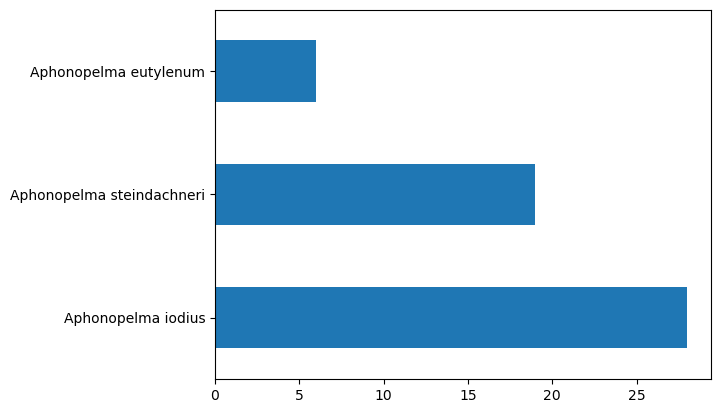

In [11]:
#basic plot: number of tarantula species observations

tarantulas['species'].value_counts().plot(kind = 'barh')


<a id='usecases'></a> 
### Use Case Examples

### Example: Filtering data for species within some distance from a point

iNaturalist datapoints contain spatial information in the form of decimal latitude and longitude. Users may wonder how frequently a species has been seen near a specific location. Some example uses for this application of iNaturalist data include: 
* An open space manager wonders if native plant restoration is successfully attracting wildlife, so she'd like to see if certain species have been spotted within the site. 
* A potential property owner is curious if certain predatory species have been spotted near this property. 
* A bird watching enthusiast is curious what different bird species have been seen within walking distance from their home.

**In this example, we'll be answering a question that I'm sure is on many of your minds: how many tarantula sightings have been reported within 1 mile of Bren Hall since the iNaturalist app launched in 2008?** 

In [12]:
import shapely 
import geopandas as gpd
import pandas as pd

# Repeated--- read in the data! 
sb_inat = pd.read_csv("/courses/EDS214/EDS220_gbffs/inat_sb_recent.csv", sep = '\t') #make sure to update the file path to where your data is stored

# Remember our tarantulas object from our first visualization! 
tarantulas = sb_inat.loc[sb_inat['family'] == "Theraphosidae"]

In [13]:
# Using shapely, create geometries from your lat-lons
geom_list = [shapely.geometry.Point(lon,lat) for lon,lat in zip(tarantulas["decimalLongitude"] , tarantulas["decimalLatitude"])] # check the ordering of lon/lat

# Create GeoPandas geodataframe
tarantulas_gdf = gpd.GeoDataFrame(tarantulas, geometry=geom_list, crs={"init":"EPSG:4326"})

/opt/python/3.10.5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [14]:
# Lets look at this CRS

tarantulas_gdf.crs # it's in degrees, we want it in meters! we should reproject it

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
tarantulas_rpj = tarantulas_gdf.to_crs("EPSG:6423") # NAD83 California Zone 5-- includes SB

tarantulas_rpj.crs # now the unit of measurement is in meters! 

<Derived Projected CRS: EPSG:6423>
Name: NAD83(2011) / California zone 5
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
# Create a GeoDataFrame with a point at Bren Hall. 
# Start with a DataFrame...
ucsb_df = pd.DataFrame(
    {'Location': ['Bren Hall'],
     'Latitude': [34.413059],
     'Longitude': [-119.841826]})

# Then use that DataFrame to make a GeoDataFrame
ucsb_gdf = gpd.GeoDataFrame(
    ucsb_df, geometry=gpd.points_from_xy(ucsb_df.Longitude, ucsb_df.Latitude), crs={"init":"EPSG:4326"})

# Reproject this GDF to the same CRS as tarantulas_rpj--- this will allow us to do calculations in meters.
ucsb_gdf = ucsb_gdf.to_crs("EPSG:6423")

# Create a buffer around Bren at 1 mile

ucsb_buffer_1mile = ucsb_gdf.buffer(1609).unary_union # in meters

not_friendly_neighbors = tarantulas_rpj["geometry"].intersection(ucsb_buffer_1mile)

# print all the nearby points
print(tarantulas_rpj[~not_friendly_neighbors.is_empty]) # Yay! No tarantulas within a mile! 

Empty GeoDataFrame
Columns: [gbifID, datasetKey, occurrenceID, kingdom, phylum, class, order, family, genus, species, infraspecificEpithet, taxonRank, scientificName, verbatimScientificName, verbatimScientificNameAuthorship, countryCode, locality, stateProvince, occurrenceStatus, individualCount, publishingOrgKey, decimalLatitude, decimalLongitude, coordinateUncertaintyInMeters, coordinatePrecision, elevation, elevationAccuracy, depth, depthAccuracy, eventDate, day, month, year, taxonKey, speciesKey, basisOfRecord, institutionCode, collectionCode, catalogNumber, recordNumber, identifiedBy, dateIdentified, license, rightsHolder, recordedBy, typeStatus, establishmentMeans, lastInterpreted, mediaType, issue, geometry]
Index: []

[0 rows x 51 columns]


/opt/python/3.10.5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [17]:
# Lets try 10 miles. A healthier distance. 

ucsb_buffer_10miles = ucsb_gdf.buffer(16094).unary_union # in meters

friendly_neighbors = tarantulas_rpj["geometry"].intersection(ucsb_buffer_10miles) 

print(len(tarantulas_rpj[~friendly_neighbors.is_empty])) # there are 8! 

8


In [18]:
# print all the nearby points--- we want the rows that AREN'T empty, hence the ~ 
print(tarantulas_rpj[~friendly_neighbors.is_empty])

            gbifID                            datasetKey  \
7013    2563466165  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
11666   2826483417  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
51240   2573835426  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
55444   2423254234  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
73228   3902868754  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
101186  1899775478  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
101272  3399221468  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
141418  2563434890  50c9509d-22c7-4a22-a47d-8c48425ef4a7   

                                             occurrenceID   kingdom  \
7013    https://www.inaturalist.org/observations/33991504  Animalia   
11666   https://www.inaturalist.org/observations/54586761  Animalia   
51240   https://www.inaturalist.org/observations/37080214  Animalia   
55444      http://www.inaturalist.org/observations/450846  Animalia   
73228   https://www.inaturalist.org/observations/13229...  Animalia   
101186  https://www.inaturalist.o

### Use Case: Inaturalist Research Grade Observations of Birds In Santa Barbara

As mentioned earlier, there can be discrepancies in observations through iNaturalist and other studies. To take a closer look at the differences, we mapped the observations of all birds in this dataset. The highest order that birds share is the class 'Aves'. This part of the tutorial provides how to make a map of these species using this data.

In [19]:
#load additional packages needed to map
import datetime
import geopandas as gpd
import seaborn as sns
import shapefile as shp
import pyproj

In [20]:
#using data read in earlier, sb_inat
#look at columns to see if we have enough information to create a spatial analysis
list(sb_inat.columns)

['gbifID',
 'datasetKey',
 'occurrenceID',
 'kingdom',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'species',
 'infraspecificEpithet',
 'taxonRank',
 'scientificName',
 'verbatimScientificName',
 'verbatimScientificNameAuthorship',
 'countryCode',
 'locality',
 'stateProvince',
 'occurrenceStatus',
 'individualCount',
 'publishingOrgKey',
 'decimalLatitude',
 'decimalLongitude',
 'coordinateUncertaintyInMeters',
 'coordinatePrecision',
 'elevation',
 'elevationAccuracy',
 'depth',
 'depthAccuracy',
 'eventDate',
 'day',
 'month',
 'year',
 'taxonKey',
 'speciesKey',
 'basisOfRecord',
 'institutionCode',
 'collectionCode',
 'catalogNumber',
 'recordNumber',
 'identifiedBy',
 'dateIdentified',
 'license',
 'rightsHolder',
 'recordedBy',
 'typeStatus',
 'establishmentMeans',
 'lastInterpreted',
 'mediaType',
 'issue']

In [21]:
#crop the initial data to just class, spp, and location information 
sb_inat_cropped = sb_inat[['class','species','decimalLatitude','decimalLongitude']]
sb_inat_cropped

,class,species,decimalLatitude,decimalLongitude
0,Magnoliopsida,Heteromeles arbutifolia,34.580555,-119.978333
1,Magnoliopsida,Trichostema lanatum,34.501962,-119.849755
2,Magnoliopsida,Oxalis pes-caprae,34.463828,-119.657692
3,Insecta,Bombus vosnesenskii,34.417709,-119.878154
4,Aves,Lanius ludovicianus,34.018571,-119.683640
...,...,...,...,...
141416,Magnoliopsida,Stephanomeria pauciflora,34.440431,-119.165206
141417,Aves,Columba livia,34.163761,-119.222627
141418,Arachnida,Aphonopelma iodius,34.456640,-119.709940
141419,Aves,Sayornis nigricans,34.456487,-119.709953


In [24]:
#now we want to isolate our table to only observations of class 'Aves'
sb_aves_locs = sb_inat_cropped[sb_inat_cropped['class'] == 'Aves']
sb_aves = gpd.GeoDataFrame(sb_aves_locs)
sb_aves_spp = sb_aves_locs[['species']]
sb_aves_spp

,species
4,Lanius ludovicianus
5,Podilymbus podiceps
6,Leiothlypis celata
11,Haemorhous mexicanus
12,Anas platyrhynchos
...,...
141380,Sitta canadensis
141385,Melozone crissalis
141393,Cyanocitta stelleri
141417,Columba livia


In [25]:
#need to convert coordinates into actual coordinates, not just data points
coords = gpd.points_from_xy( sb_aves_locs['decimalLongitude'], sb_aves_locs['decimalLatitude'], crs = "EPSG:4326")


sb_aves_gdf = gpd.GeoDataFrame(sb_aves_spp, geometry=coords)
sb_aves_gdf

,species,geometry
4,Lanius ludovicianus,POINT (-119.68364 34.01857)
5,Podilymbus podiceps,POINT (-119.80862 34.40889)
6,Leiothlypis celata,POINT (-119.84592 34.41563)
11,Haemorhous mexicanus,POINT (-119.76871 34.44644)
12,Anas platyrhynchos,POINT (-119.19086 34.14595)
...,...,...
141380,Sitta canadensis,POINT (-119.17160 34.85258)
141385,Melozone crissalis,POINT (-119.81410 34.42381)
141393,Cyanocitta stelleri,POINT (-119.65821 34.46513)
141417,Columba livia,POINT (-119.22263 34.16376)


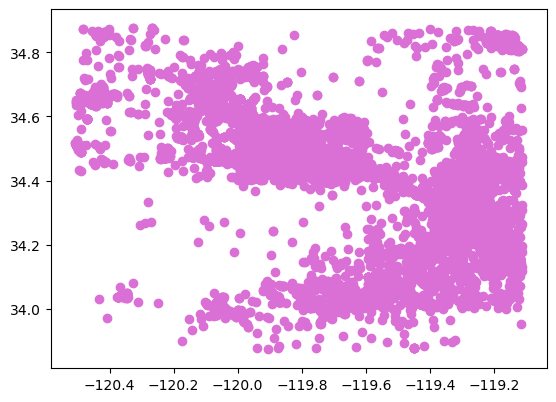

In [26]:
#see if this worked, if it did now we have our observations of birds plotted
sb_aves_gdf.plot(aspect = 1,
                color = "orchid")

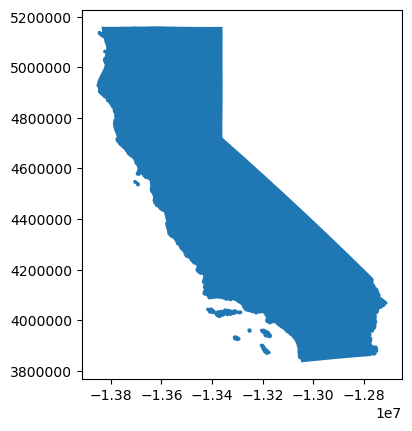

In [27]:
#need to plot the observations onto a sb shapefile

#setting up shp file path for CA state boundary (found online - https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)
shp_data = gpd.read_file("/courses/EDS214/EDS220_gbffs/ca-state-boundary/CA_State_TIGER2016.shp")

#produces an outline of CA 
shp_data.plot()

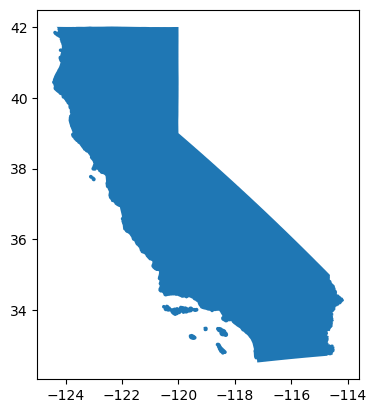

In [28]:
#need to convert shp file into a lat/lon situation instead of meters
shp_reproj = shp_data.to_crs("epsg:4326") 
shp_reproj.plot()

In [29]:
#check that this worked and that both data are on the same crs
shp_reproj.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

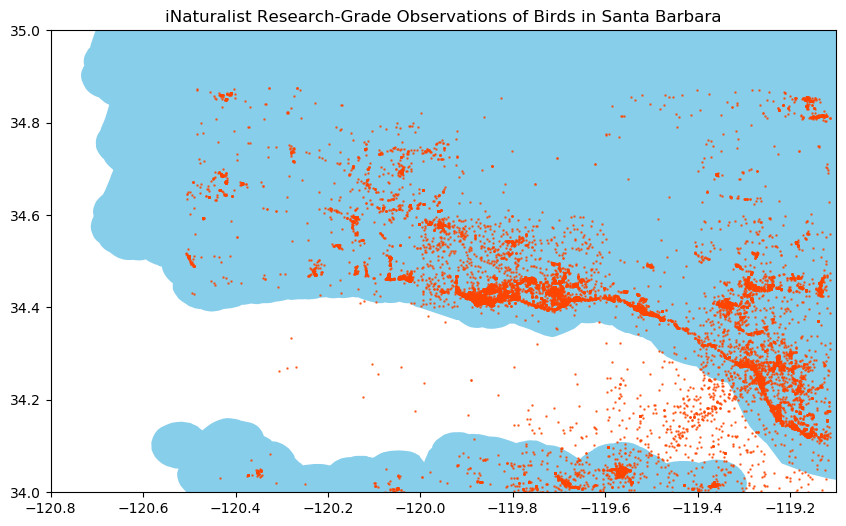

In [30]:
#make outline of sb to overlay inaturalist data onto

#defining size of output figure
fig, ax = plt.subplots(figsize=(14,6))

#setting boundaries
xmin = -120.8
xmax = -119.1
ymin = 34
ymax = 35

#feed min and max thru into limits for x and y axis
xlim = (xmin, xmax)
ylim = (ymin, ymax)

#set axis to x and y limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

#sb map
plt.title("iNaturalist Research-Grade Observations of Birds in Santa Barbara")
shp_reproj.plot(legend = False, ax = ax,
               color = "skyblue")

#sb aves 
sb_aves_gdf.plot(aspect = 1,
               color = "orangered",
                marker = "o",
                 alpha = 0.75,
                 markersize = 0.6,
               ax = ax)


Comparing this map to this one from the Santa Barbara Audobon Society, there are obvious discrepancies. This map is a map of observed breeding activity, not just all birds like the iNaturalist map. This is being used to compare since there aren't other maps outlining bird observations in Santa Barbara. First, the iNaturalist data is not showing values right along the coast, and includes some observations in the ocean. Next, like in the last use case, these are only observations made by citizen scientists being mapped. There could be overlap with two observations of the same bird by different users or there could just be that many more birds in one area. This is a downside of using citizen science data. However, both maps have a concentration of birds in the Goleta area. Citizen science can be helpful in identifying certain behaviors or patterns, but not others.
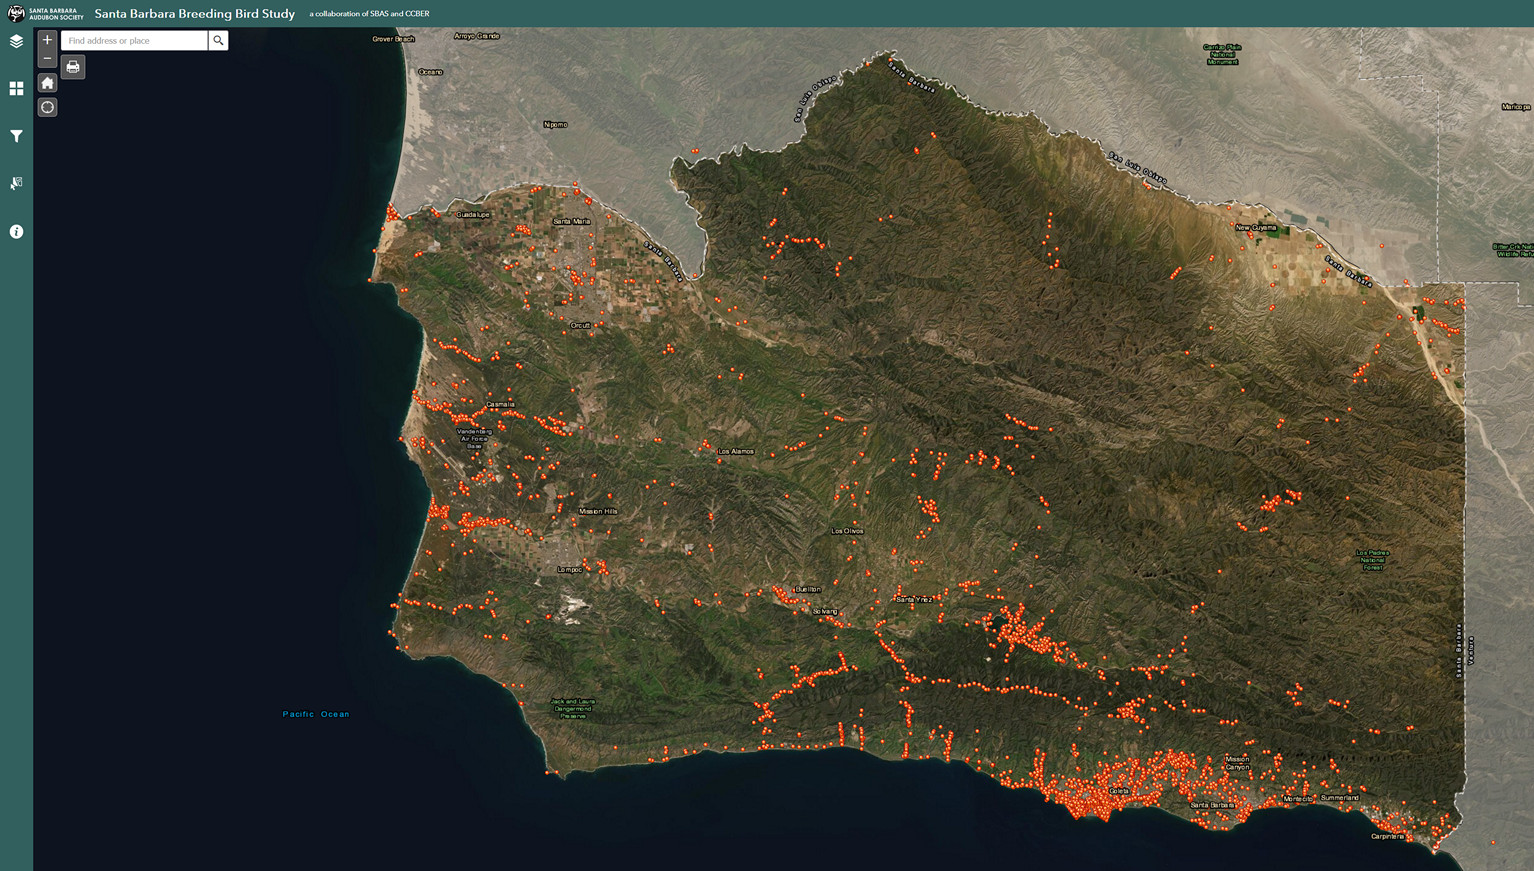

<a id='references'></a> 
### References

1. iNaturalist, https://www.inaturalist.org/
2. GBIF, https://www.gbif.org/what-is-gbif
3. pygbif 0.6.1 documentation, https://pygbif.readthedocs.io/en/latest/index.html
4. Santa Barbara Bird Observations https://santabarbaraaudubon.org/santa-barbara-county-breeding-bird-study/
